In [1]:
%load_ext autoreload
%autoreload 2

import sympy as sp

In [2]:
gm1, go1, CM, gm2, YL, s = sp.symbols(r"g_{m1} g_{o1} C_M g_{m2} Y_L s")
ro1, RL, GL, CL = sp.symbols(r"r_{o1} R_L G_L C_L")
w, f = sp.symbols(r'\omega f')

G_exact = sp.Matrix(
    [
        [0, 0, 0, 1],
        [-gm1, go1 + s * CM, -s * CM, 0],
        [0, gm2 - s * CM, YL + s * CM, 0],
        [1, 0, 0, 0],
    ]
)


\begin{align}
\begin{bmatrix}
i_i \\
i_x \\
i_o \\
v_s 
\end{bmatrix}
&=
\begin{bmatrix}
      0 &             0 &        0 & 1 \\
-g_{m1} & g_{o1} + sC_M &    -sC_M & 0 \\
      0 & g_{m2} - sC_M & Y_L+sC_M & 0 \\
      1 &             0 &        0 & 0
\end{bmatrix}
\begin{bmatrix}
v_i \\
v_x \\
v_o \\
i_s
\end{bmatrix}
\\
\begin{bmatrix}
0 \\
0 \\
0 \\
1 
\end{bmatrix}
&=
\begin{bmatrix}
      0 &             0 &        0 & 1 \\
-g_{m1} & g_{o1} + sC_M &    -sC_M & 0 \\
      0 & g_{m2} - sC_M & Y_L+sC_M & 0 \\
      1 &             0 &        0 & 0
\end{bmatrix}
\begin{bmatrix}
v_i \\
v_x \\
v_o \\
i_s
\end{bmatrix}
\\
\vec{\mathbf{s}} &= \mathbf{G}\vec{\mathbf{r}}\\
\mathbf{G}^{-1} \vec{\mathbf{s}} &= \vec{\mathbf{r}}
\end{align}

In [3]:
S_vector = sp.Matrix([0, 0, 0, 1])
R_vector = G_exact.inv()*S_vector
R_vector

Matrix([
[                                                                                    1],
[   (C_M*g_{m1}*s + Y_L*g_{m1})/(C_M*Y_L*s + C_M*g_{m2}*s + C_M*g_{o1}*s + Y_L*g_{o1})],
[(C_M*g_{m1}*s - g_{m1}*g_{m2})/(C_M*Y_L*s + C_M*g_{m2}*s + C_M*g_{o1}*s + Y_L*g_{o1})],
[                                                                                    0]])

In [4]:
gain = R_vector[2]
gain = gain.subs({
    go1: 1/ro1,
    YL: GL + s*CL
})
gain = gain.subs({
    GL: 1/RL,
    s: 2*sp.pi*f*1j
})
gain

(2.0*I*pi*C_M*f*g_{m1} - g_{m1}*g_{m2})/(2.0*I*pi*C_M*f*g_{m2} + 2.0*I*pi*C_M*f*(2.0*I*pi*C_L*f + 1/R_L) + 2.0*I*pi*C_M*f/r_{o1} + (2.0*I*pi*C_L*f + 1/R_L)/r_{o1})

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fn = sp.lambdify(f, gain.subs({
    CM: 5e-12,
    ro1: 500e3,
    RL: 2e3,
    CL: 15e-12,
    gm1: 10e-3,
    gm2: 10e-3,
}))

In [6]:
q = np.logspace(-3, 12, 100)
mag = 20*np.log10(np.abs(fn(q)))
pha = np.angle(fn(q), deg=True)

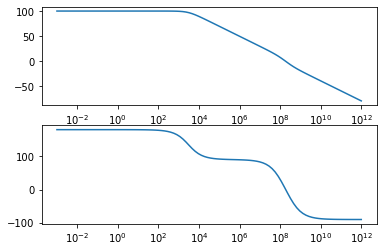

In [8]:
fig = plt.figure()

ax = fig.add_subplot(2, 1, 1)
ax.plot(q, mag)

ax = fig.add_subplot(2, 1, 2, sharex=ax)
ax.plot(q, pha)
ax.set_xscale('log')